# Global Greenhouse Gas Emission

![Refinery Plants Landscape](https://www.universityofcalifornia.edu/sites/default/files/longform/images/emissions_0.jpg)
  
                        Figure 1. Refinery Plant Landscape from University of California

Within the tapestry of global environmental concerns, few issues loom as large or carry as wide-ranging consequences as greenhouse gas (GHG) emissions. These emissions, stemming largely from human activities, stand as the primary driver behind the drastic shifts in our planet's climate patterns. The intricate interplay of industries, transportation, agriculture, and energy production contributes to a complex web of GHG generation, impacting regions and countries worldwide in distinctive ways. Understanding the dynamics of GHG emissions is not merely an academic pursuit; it's a critical endeavor toward developing targeted solutions and policies that can mitigate these emissions and guide us toward a more sustainable future. This exploration seeks to unravel the multifaceted facets of GHG emissions, probing the contributing factors across diverse geographical regions to paint a comprehensive picture of our global environmental footprint, where the datasets were retrieved from the International Energy Agency (IEA) and Kaggle.

In [1]:
library(dplyr)
library(ggplot2)
library(rnaturalearth)
library(rnaturalearthdata)
library(sf)
library(rgeos)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'rnaturalearth' was built under R version 3.6.3"Warning message:
"package 'rnaturalearthdata' was built under R version 3.6.3"Warning message:
"package 'sf' was built under R version 3.6.2"Linking to GEOS 3.6.1, GDAL 2.2.3, PROJ 4.9.3
Loading required package: sp
rgeos version: 0.5-1, (SVN revision 614)
 GEOS runtime version: 3.6.1-CAPI-1.10.1 
 Linking to sp version: 1.3-1 
 Polygon checking: TRUE 



In [2]:
setwd("C:/Users/Loh Juin Xian/Documents/NTU/Coding")
df = read.csv("IEA-methane-emissions-data.csv")
str(df)


'data.frame':	2122 obs. of  9 variables:
 $ region   : Factor w/ 9 levels "Africa","Asia Pacific",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ country  : Factor w/ 150 levels "","Algeria","Angola",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ emissions: num  280.7 0.044 120.014 64.416 0 ...
 $ source   : Factor w/ 1 level "IEA": 1 1 1 1 1 1 1 1 1 1 ...
 $ type     : Factor w/ 4 levels "Agriculture",..: 1 2 2 2 2 2 2 2 2 2 ...
 $ segment  : Factor w/ 12 levels "Bioenergy","Coking coal",..: 12 1 3 3 4 4 5 5 5 6 ...
 $ reason   : Factor w/ 4 levels "All","Flared",..: 1 1 3 4 3 4 2 3 4 3 ...
 $ baseYear : Factor w/ 2 levels "2018-2019","2021": 1 2 2 2 2 2 2 2 2 2 ...
 $ notes    : Factor w/ 2 levels "Average based on United Nations Framework Convention on Climate Change (UNFCCC) (2021), Greenhouse Gas Data Int"| __truncated__,..: 1 2 2 2 2 2 2 2 2 2 ...


In [3]:
df = df %>% select(c("region","country","emissions","type","segment","reason","baseYear"))

# Convert all country names to uppercase
df <- df %>% mutate(country = toupper(country)) %>% distinct() 

str(df)



'data.frame':	2122 obs. of  7 variables:
 $ region   : Factor w/ 9 levels "Africa","Asia Pacific",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ country  : chr  "ALGERIA" "ALGERIA" "ALGERIA" "ALGERIA" ...
 $ emissions: num  280.7 0.044 120.014 64.416 0 ...
 $ type     : Factor w/ 4 levels "Agriculture",..: 1 2 2 2 2 2 2 2 2 2 ...
 $ segment  : Factor w/ 12 levels "Bioenergy","Coking coal",..: 12 1 3 3 4 4 5 5 5 6 ...
 $ reason   : Factor w/ 4 levels "All","Flared",..: 1 1 3 4 3 4 2 3 4 3 ...
 $ baseYear : Factor w/ 2 levels "2018-2019","2021": 1 2 2 2 2 2 2 2 2 2 ...


## 1.0 Emissions Trends Over Base Years by Country

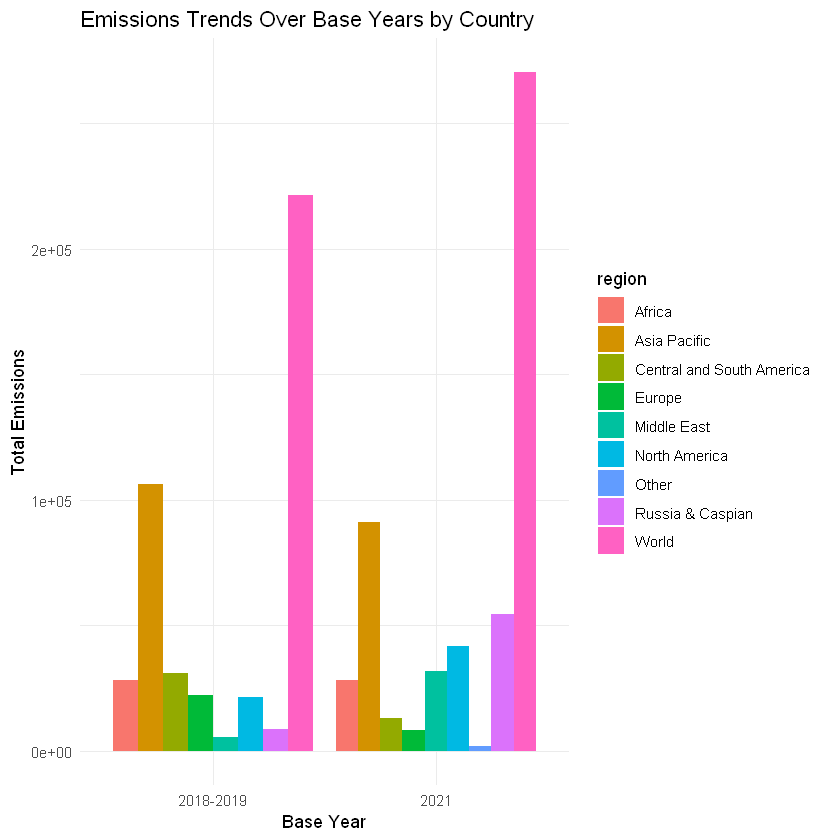

In [4]:
country_emission <- df %>% 
  group_by(region, baseYear) %>% 
  summarise(total_emissions = sum(emissions))

ggplot(country_emission, aes(x = baseYear, y = total_emissions, fill = region)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Emissions Trends Over Base Years by Country", x = "Base Year", y = "Total Emissions") + 
  theme_minimal()

## 2.0 Total Emissions by Region

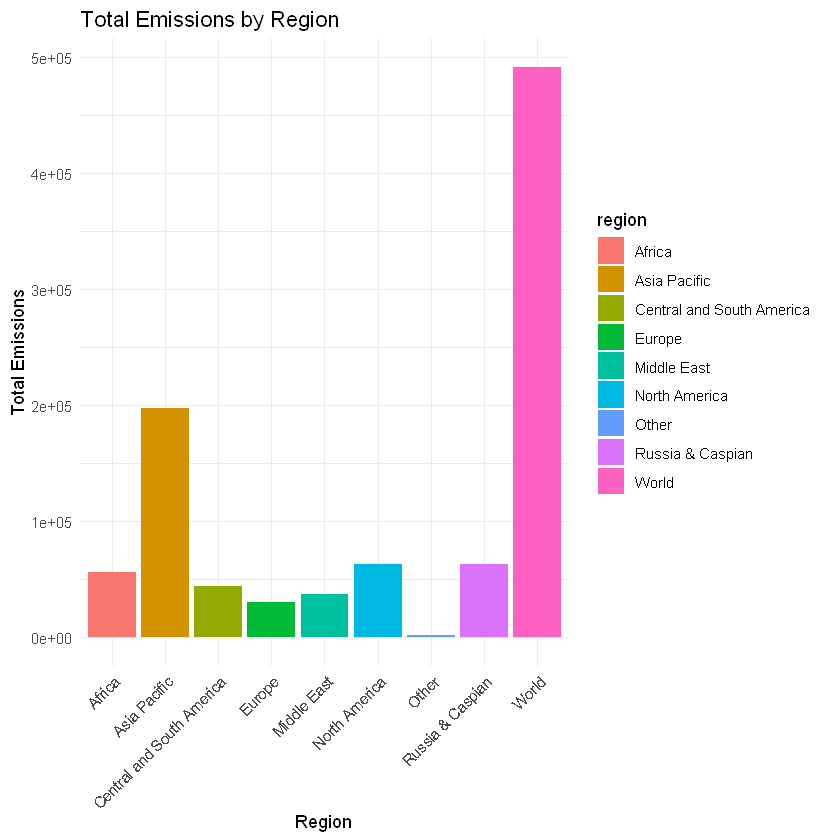

In [5]:
region_emission <- df %>%
  group_by(region) %>%
  summarise(total_emissions = sum(emissions))

ggplot(region_emission, aes(x = region, y = total_emissions, fill = region)) +
  geom_bar(stat="identity") +
  labs(title = "Total Emissions by Region", x = "Region", y = "Total Emissions") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


## 3.0 Map Data Visualization 

In [6]:
world_emissions = df %>%
  filter(baseYear=="2021") %>%
  select("country","region","emissions") %>%
  group_by(country) %>%
  summarise(total_emissions= sum(emissions))

world_emissions = world_emissions[-1,]

str(world_emissions)

Classes 'tbl_df', 'tbl' and 'data.frame':	111 obs. of  2 variables:
 $ country        : chr  "ALGERIA" "ANGOLA" "ARGENTINA" "AUSTRALIA" ...
 $ total_emissions: num  5184 1023 2014 4692 669 ...


In [7]:
#Importing country coordinates datasets
coordinates = read.csv("countrycoordinates.csv", header=T)
coordinates = coordinates %>% mutate(country = toupper(country))

str(coordinates)


'data.frame':	245 obs. of  4 variables:
 $ country_code: Factor w/ 244 levels "AD","AE","AF",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ latitude    : num  42.5 23.4 33.9 17.1 18.2 ...
 $ longitude   : num  1.6 53.8 67.7 -61.8 -63.1 ...
 $ country     : chr  "ANDORRA" "UNITED ARAB EMIRATES" "AFGHANISTAN" "ANTIGUA AND BARBUDA" ...


In [8]:
world_emissions = merge(world_emissions,coordinates,by='country', all.x=TRUE)
head(world_emissions)

country,total_emissions,country_code,latitude,longitude
ALGERIA,5184.4658,DZ,28.03389,1.659626
ANGOLA,1023.0558,AO,-11.20269,17.873887
ARGENTINA,2013.6652,AR,-38.41610,-63.616672
AUSTRALIA,4691.8762,AU,-25.27440,133.775136
AZERBAIJAN,669.0396,AZ,40.14310,47.576927
BAHRAIN,373.4894,BH,25.93041,50.637772


Warning message:
"Removed 15 rows containing missing values (geom_point)."

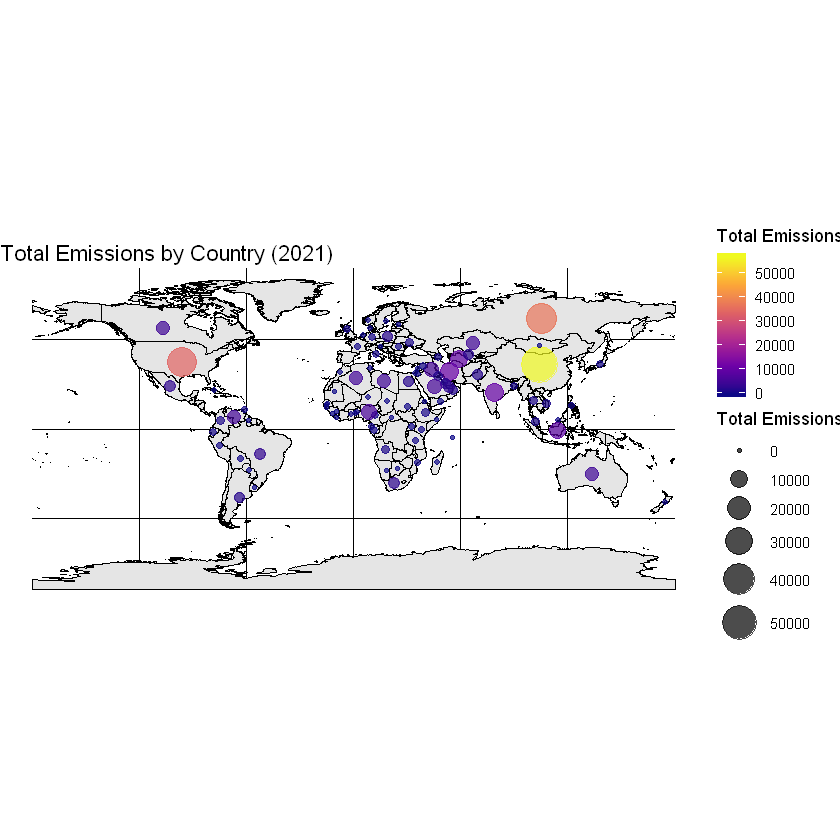

In [9]:
# Get world map data

world <- ne_countries(scale = "medium", returnclass = "sf")


# Merge emissions data with world map data
map_data <- world %>%
  left_join(world_emissions, by = c("name" = "country"))

# Plot choropleth map for total emissions
ggplot() +
  geom_sf(data = map_data, color = "black") +
  geom_point(data = world_emissions, aes(x = longitude, y = latitude, size = total_emissions, color = total_emissions), alpha=0.7) +
  scale_size_continuous(range = c(1, 10)) +
  scale_color_viridis_c(option = "plasma", na.value = "grey") +
  labs(title = "Total Emissions by Country (2021)",
       size = "Total Emissions",
       color = "Total Emissions") +
  theme_void()

## 4.0 Investigating Asia

In [10]:
asia_data <- df %>% filter(region == "Asia Pacific")  

head(asia_data)

region,country,emissions,type,segment,reason,baseYear
Asia Pacific,AUSTRALIA,2865.4751,Agriculture,Total,All,2018-2019
Asia Pacific,AUSTRALIA,18.4640,Energy,Bioenergy,All,2021
Asia Pacific,AUSTRALIA,871.9600,Energy,Coking coal,All,2021
Asia Pacific,AUSTRALIA,36.1483,Energy,Gas pipelines and LNG facilities,Fugitive,2021
Asia Pacific,AUSTRALIA,19.4023,Energy,Gas pipelines and LNG facilities,Vented,2021
Asia Pacific,AUSTRALIA,76.4212,Energy,Offshore gas,Fugitive,2021


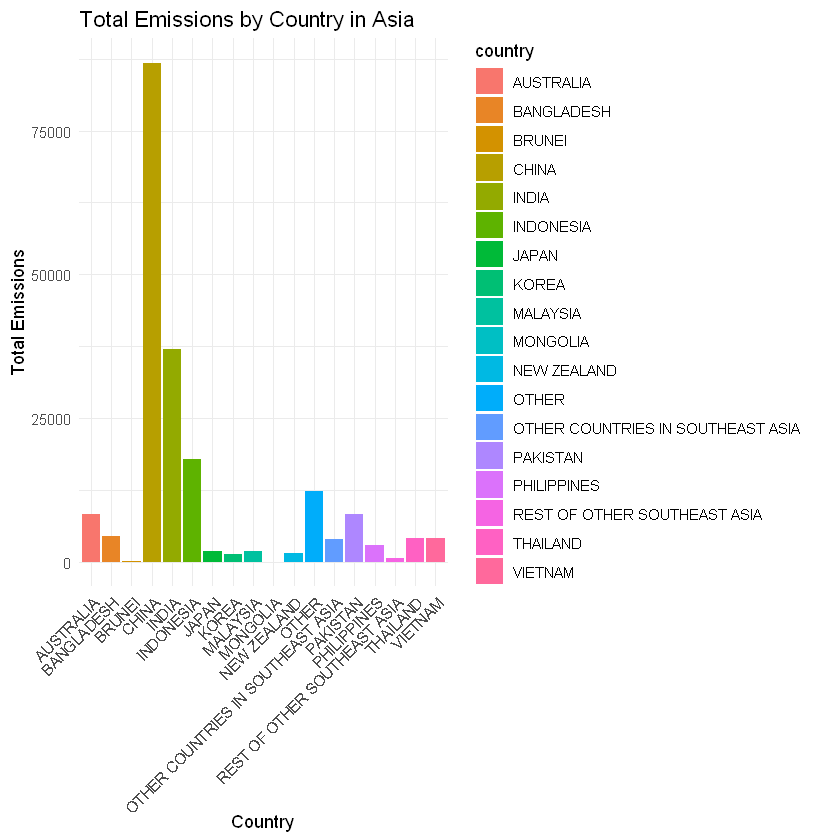

In [11]:
asia_emissions <- asia_data %>%
  group_by(country) %>%
  summarise(total_emissions = sum(emissions))

ggplot(asia_emissions, aes(x = country, y = total_emissions, fill = country)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Emissions by Country in Asia", x = "Country", y = "Total Emissions") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  
  


### 4.1 Asia Country with the Highest Methane Emission

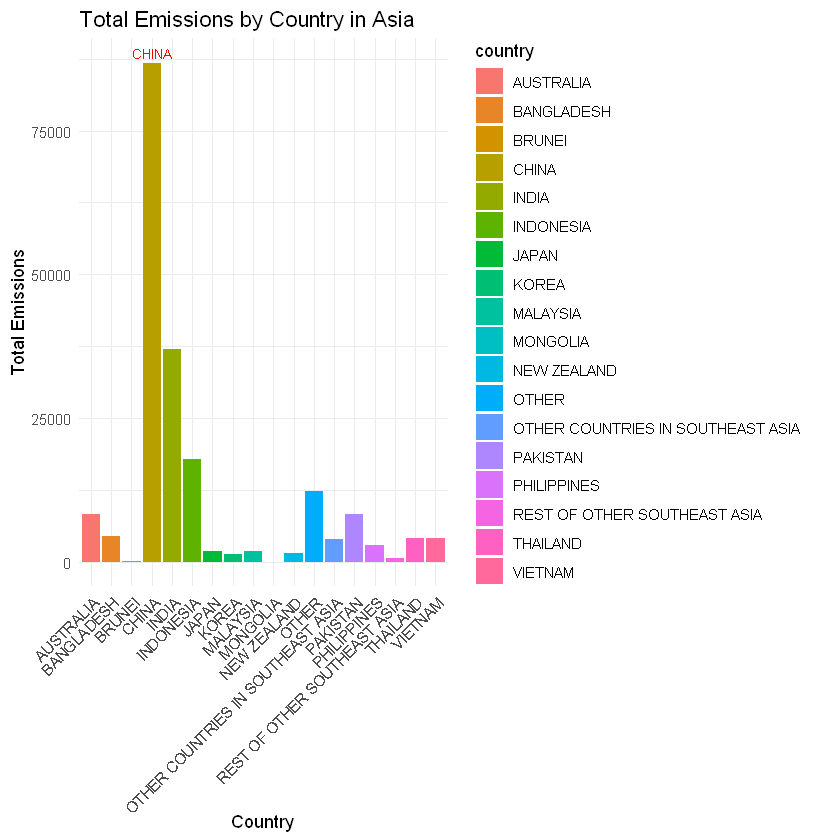

In [12]:
# Find the country with the highest emission
highest_emission_country <- asia_emissions %>%
  arrange(desc(total_emissions)) %>%
  slice(1)  # Select the top country with the highest emissions

ggplot(asia_emissions, aes(x = country, y = total_emissions, fill = country)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Emissions by Country in Asia", x = "Country", y = "Total Emissions") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  
  geom_text(data = highest_emission_country, aes(label = country, y = total_emissions), vjust = -0.5, size = 3, color = "red")



### 4.2 Finding Out What Contributes to China GHG Emission 

In [13]:
china_emission = df %>%
  filter(country == "CHINA" & baseYear=="2021") %>% 
  arrange(desc(emissions))

head(china_emission,12)

region,country,emissions,type,segment,reason,baseYear
Asia Pacific,CHINA,28326.8730,Energy,Total,All,2021
Asia Pacific,CHINA,15557.2002,Energy,Steam coal,All,2021
Asia Pacific,CHINA,7784.5498,Energy,Coking coal,All,2021
Asia Pacific,CHINA,974.6640,Energy,Bioenergy,All,2021
Asia Pacific,CHINA,939.6590,Energy,Other from coal,All,2021
Asia Pacific,CHINA,734.8650,Energy,Onshore oil,Vented,2021
Asia Pacific,CHINA,582.4160,Energy,Onshore gas,Vented,2021
Asia Pacific,CHINA,471.6680,Energy,Gas pipelines and LNG facilities,Fugitive,2021
Asia Pacific,CHINA,371.3977,Energy,Other from oil and gas,All,2021
Asia Pacific,CHINA,265.0760,Energy,Onshore gas,Fugitive,2021


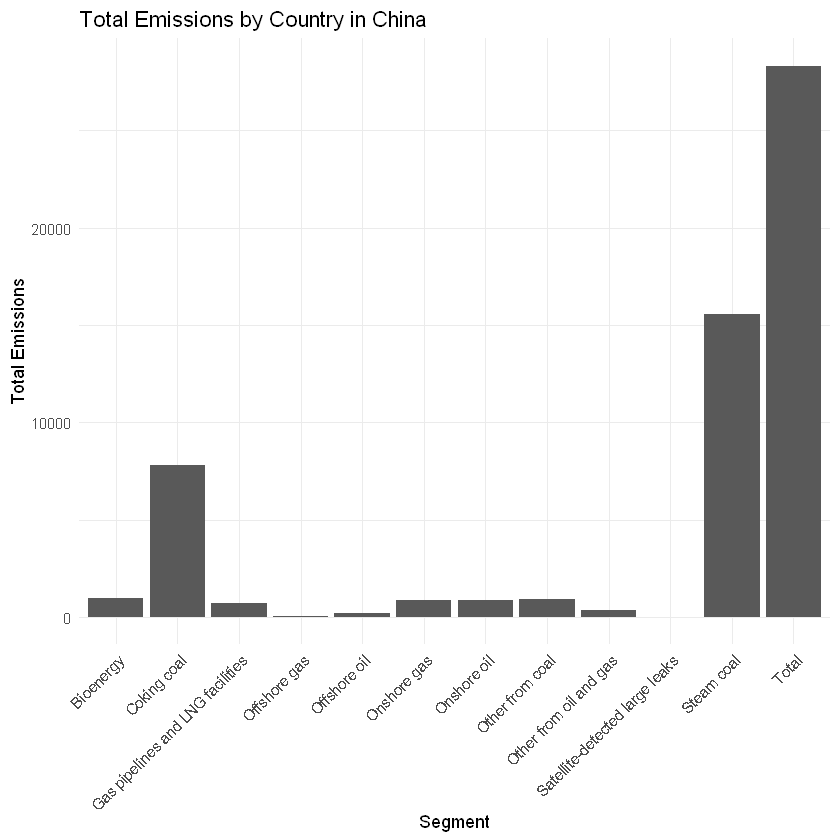

In [14]:
ggplot(china_emission, aes(segment, emissions))+geom_bar(stat="identity")+
  labs(title = "Total Emissions by Country in China", x = "Segment", y = "Total Emissions") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for better readability 

## 5.0 Change in GHG Emission over Base Years

In [15]:
emissions_2021 <- df %>%
  filter(baseYear == "2021") %>%
  group_by(region) %>%
  summarise(total_emissions_2021 = sum(emissions))

emissions_2019 = df %>%
  filter(baseYear == "2018-2019") %>%
  group_by(region) %>%
  summarise(total_emissions_2018_2019 = sum(emissions))

# Merge the aggregated data for comparison
emissions_comparison <- merge(emissions_2019, emissions_2021, by = "region", all = TRUE) %>% 
  mutate(changes=((total_emissions_2021 - total_emissions_2018_2019)/total_emissions_2018_2019)*100) %>% arrange(desc(changes)) %>% 
  filter(region!="Other")

head(emissions_comparison,10)

region,total_emissions_2018_2019,total_emissions_2021,changes
Russia & Caspian,8918.725,54382.683,509.7584831
Middle East,5617.210,31704.778,464.4221753
North America,21307.553,41810.637,96.2244865
World,221657.401,270463.423,22.0186744
Africa,28169.178,28105.931,-0.2245262
Asia Pacific,106241.336,91044.985,-14.3036145
Central and South America,31078.785,12945.752,-58.3453714
Europe,22404.923,8188.348,-63.4529044


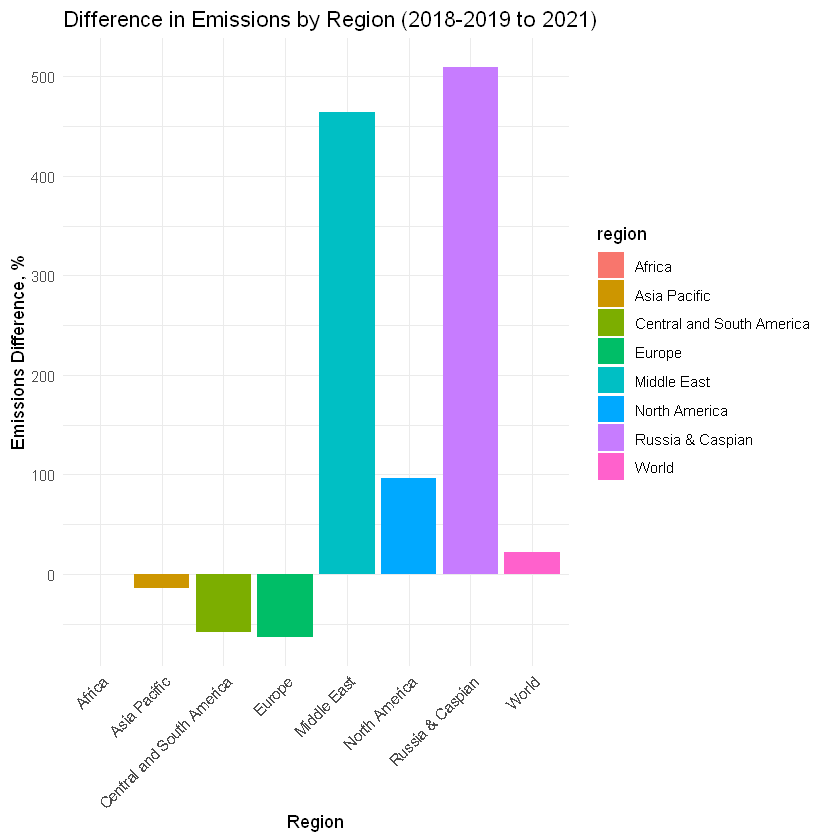

In [16]:
ggplot(emissions_comparison, aes(x = region, y = changes, fill = region)) +
  geom_bar(stat = "identity") +
  labs(title = "Difference in Emissions by Region (2018-2019 to 2021)", x = "Region", y = "Emissions Difference, %") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## 6.0 Investigating Drastic Changes in Middle East and Russia

### 6.1 The Middle East 

region,country,emissions,type,segment,reason,baseYear
Middle East,IRAN,5527.374,Energy,Total,All,2021
Middle East,SAUDI ARABIA,2863.539,Energy,Total,All,2021
Middle East,IRAQ,2807.418,Energy,Total,All,2021
Middle East,IRAQ,1484.640,Energy,Onshore oil,Vented,2021
Middle East,SAUDI ARABIA,1415.460,Energy,Onshore oil,Vented,2021
Middle East,UNITED ARAB EMIRATES,1364.966,Energy,Total,All,2021


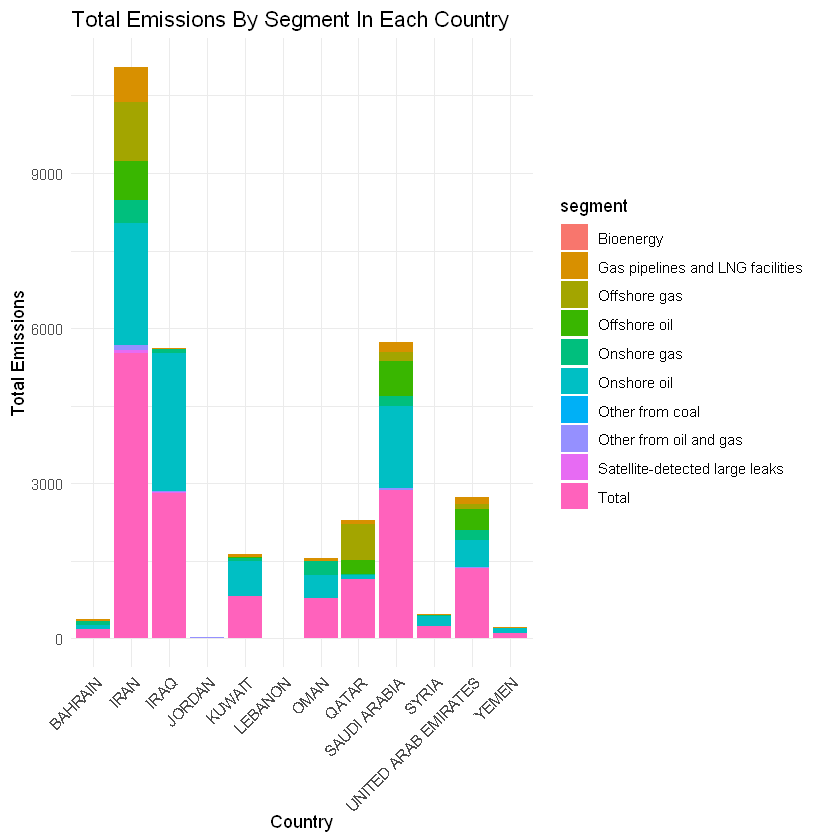

In [17]:
me = df %>%
  filter(region=='Middle East'& baseYear=="2021") %>%
  group_by(segment) %>% 
  arrange(desc(emissions))

head(me)

ggplot(me, aes(country,emissions,fill=segment)) +
        geom_bar(stat='identity', position='stack')+
        labs(title = "Total Emissions By Segment In Each Country", x = "Country", y = "Total Emissions")+
        theme_minimal()+
        theme(axis.text.x = element_text(angle = 45, hjust = 1))


### 6.2 Russia 

region,country,emissions,type,segment,reason,baseYear
Russia & Caspian,RUSSIA,18392.314,Energy,Total,All,2021
Russia & Caspian,TURKMENISTAN,4856.910,Energy,Total,All,2021
Russia & Caspian,RUSSIA,4232.210,Energy,Onshore oil,Vented,2021
Russia & Caspian,RUSSIA,3462.840,Energy,Onshore gas,Vented,2021
Russia & Caspian,KAZAKHSTAN,2530.891,Energy,Total,All,2021
Russia & Caspian,RUSSIA,1683.110,Energy,Steam coal,All,2021


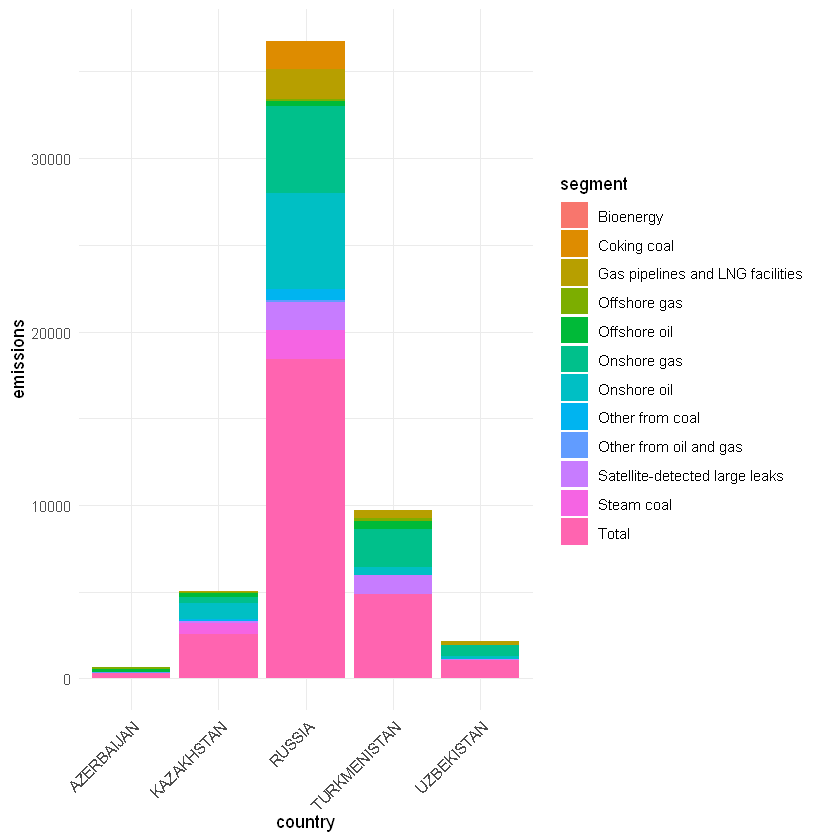

In [18]:
rc = df %>%
  filter(region=='Russia & Caspian'& baseYear=="2021") %>%
  group_by(segment) %>% 
  arrange(desc(emissions))

head(rc)

ggplot(rc, aes(country,emissions,fill=segment)) + 
      geom_bar(stat='identity', position='stack')+
      theme_minimal()+
      theme(axis.text.x = element_text(angle = 45, hjust = 1))

## 7.0  Total Emission by Sectors

In [19]:
sector_emissions = df %>%
  group_by(type)%>%
  summarise(Total_emissions=sum(emissions))

head(sector_emissions)

type,Total_emissions
Agriculture,284521.03
Energy,540752.88
Other,14780.47
Waste,146093.62


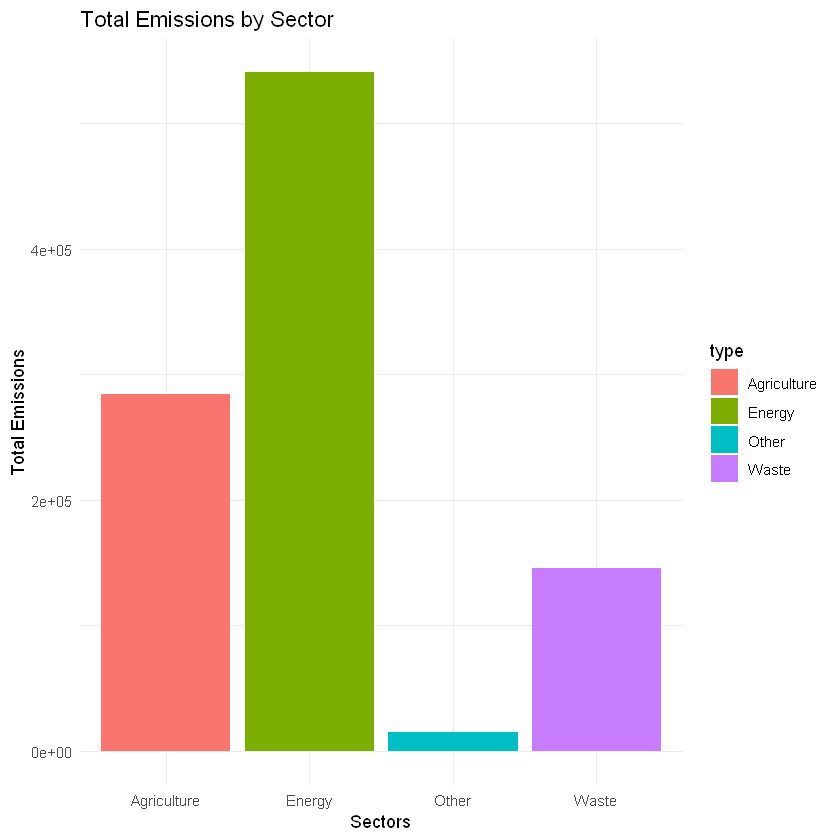

In [20]:
ggplot(sector_emissions, aes(x = type, y = Total_emissions, fill=type)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Emissions by Sector", x = "Sectors", y = "Total Emissions") +
  theme_minimal()

## 8.0  Total Emission by Segments

In [21]:
segment_emission = df %>%
  group_by(segment) %>%
  summarise(total_emissions=sum(emissions)) %>%
  filter(segment!="Total")

head(segment_emission)

segment,total_emissions
Bioenergy,18281.688
Coking coal,23949.625
Gas pipelines and LNG facilities,21953.941
Offshore gas,9943.869
Offshore oil,18422.918
Onshore gas,41951.339


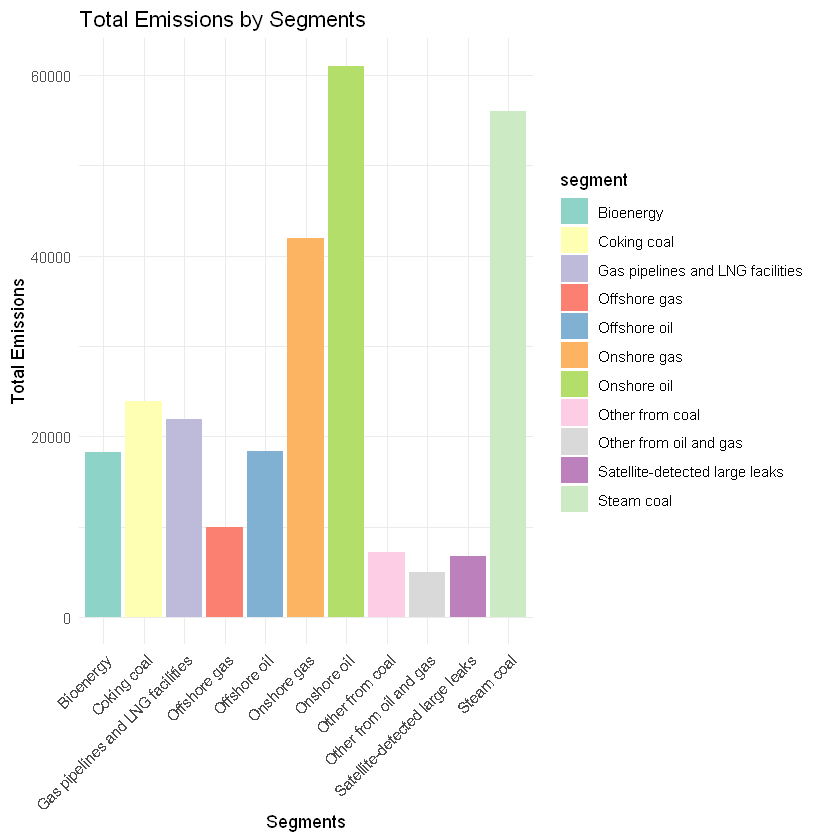

In [22]:
ggplot(segment_emission, aes(x = segment, y = total_emissions, fill=segment)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set3") +  
  labs(title = "Total Emissions by Segments", x = "Segments", y = "Total Emissions") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  
